In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [1]:
!cp /content/drive/MyDrive/NSL-KDD.arff NSL-KDD.arff 

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

In [3]:
with open('NSL-KDD.arff', 'r') as file:
    lines = file.readlines()

data_lists = []
for line in lines:
    line = line.strip()
    line_list = line.split(',')
    data_lists.append(line_list)

In [4]:
# Column names
columns = ['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent',
           'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root',
           'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login',
           'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
           'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
           'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
           'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
           'dst_host_srv_rerror_rate', 'class']

df = pd.DataFrame(data_lists, columns=columns)

# Convert columns to numeric
numeric_columns = ['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
                   'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted',
                   'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds',
                   'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate',
                   'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
                   'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate',
                   'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
                   'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

In [5]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# 1. Drop missing values:
df.dropna(inplace=True)  

# 2. Scale Numerical Variables for these 3 columns:
numerical_cols = ["duration", "src_bytes", "dst_bytes"]
scaler = MinMaxScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# 3. String to Numerical:
protocol_mapping = {'udp': 0, 'tcp': 1, 'icmp': 2}
service_mapping = {'other': 0, 'private': 1, 'http': 2, 'remote_job': 3, 'ftp_data': 4, 'name': 5, 'netbios_ns': 6, 'eco_i': 7, 'mtp': 8, 'telnet': 9, 'finger': 10, 'domain_u': 11, 'supdup': 12, 'uucp_path': 13, 'Z39_50': 14, 'smtp': 15, 'csnet_ns': 16, 'uucp': 17, 'netbios_dgm': 18, 'urp_i': 19, 'auth': 20, 'domain': 21, 'ftp': 22, 'bgp': 23, 'ldap': 24, 'ecr_i': 25, 'gopher': 26, 'vmnet': 27, 'systat': 28, 'http_443': 29, 'efs': 30, 'whois': 31, 'imap4': 32, 'iso_tsap': 33, 'echo': 34, 'klogin': 35, 'link': 36, 'sunrpc': 37, 'login': 38, 'kshell': 39, 'sql_net': 40, 'time': 41, 'hostnames': 42, 'exec': 43, 'ntp_u': 44, 'discard': 45, 'nntp': 46, 'courier': 47, 'ctf': 48, 'ssh': 49, 'daytime': 50, 'shell': 51, 'netstat': 52, 'pop_3': 53, 'nnsp': 54, 'IRC': 55, 'pop_2': 56, 'printer': 57, 'tim_i': 58, 'pm_dump': 59, 'red_i': 60, 'netbios_ssn': 61, 'rje': 62, 'X11': 63, 'urh_i': 64, 'http_8001': 65, 'aol': 66, 'http_2784': 67, 'tftp_u': 68, 'harvest': 69}
flag_mapping = {'SF': 0, 'S0': 1, 'REJ': 2, 'RSTR': 3, 'SH': 4, 'RSTO': 5, 'S1': 6, 'RSTOS0': 7, 'S3': 8, 'S2': 9, 'OTH': 10}
class_mapping = {'normal':0 , 'anomaly':1}
df['protocol_type'] = df['protocol_type'].map(protocol_mapping)
df['service'] = df['service'].map(service_mapping)
df['flag'] = df['flag'].map(flag_mapping)
df['class'] = df['class'].map(class_mapping)

In [6]:
print(df.dtypes)


duration                       float64
protocol_type                    int64
service                          int64
flag                             int64
src_bytes                      float64
dst_bytes                      float64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [7]:
import pandas as pd
null_counts = df.isnull().sum()
columns_with_nulls = null_counts[null_counts > 0]
print(columns_with_nulls)

Series([], dtype: int64)


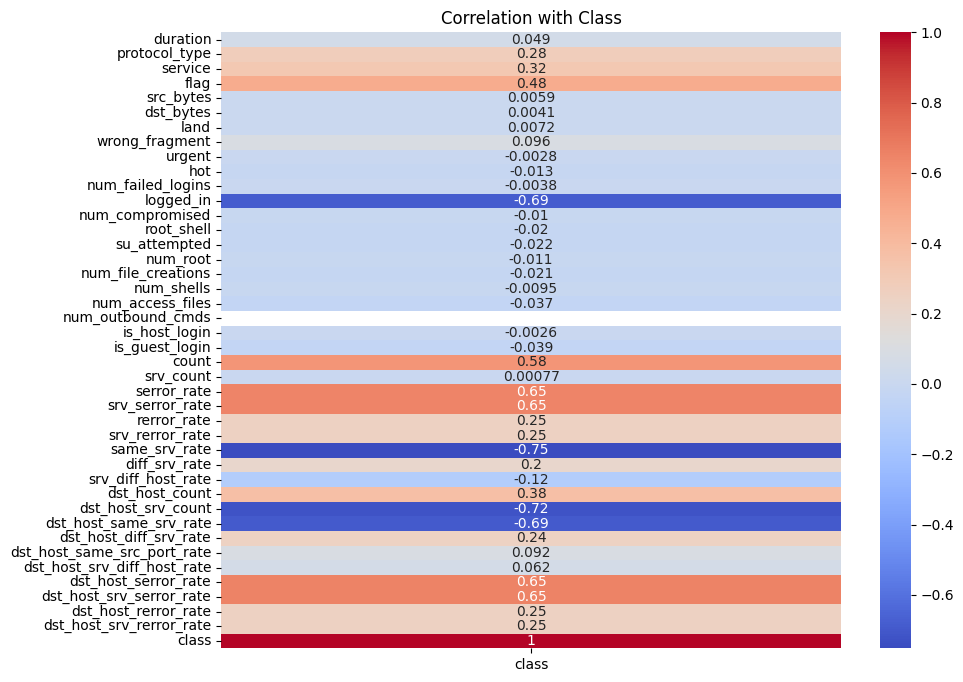

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = df.corr()[['class']]
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title('Correlation with Class')
plt.show()


In [9]:
correlation_filter = (correlation_matrix['class'] > -0.1) & (correlation_matrix['class'] < 0.1)
filtered_columns = correlation_matrix[correlation_filter].index
print("Columns with correlations between -0.1 and +0.1:")
print(filtered_columns)

Columns with correlations between -0.1 and +0.1:
Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_host_login', 'is_guest_login', 'srv_count',
       'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate'],
      dtype='object')


In [10]:
df_filtered = df.drop(filtered_columns, axis=1)
#df_filtered = df_filtered.drop(filtered_columns, axis=1)

In [11]:
df_filtered = df_filtered.drop('num_outbound_cmds', axis=1)

In [12]:
print(df_filtered)

        protocol_type  service  flag  logged_in  count  serror_rate  \
0                   1        4     0          0      2          0.0   
1                   0        0     0          0     13          0.0   
2                   1        1     1          0    123          1.0   
3                   1        2     0          1      5          0.2   
4                   1        2     0          1     30          0.0   
...               ...      ...   ...        ...    ...          ...   
125968              1        1     1          0    184          1.0   
125969              0        1     0          0      2          0.0   
125970              1       15     0          1      1          0.0   
125971              1       35     1          0    144          1.0   
125972              1        4     0          1      1          0.0   

        srv_serror_rate  rerror_rate  srv_rerror_rate  same_srv_rate  ...  \
0                   0.0          0.0              0.0           1.00  

In [13]:
#Now lets make the model:
X = df_filtered.drop('class', axis=1)
y = df_filtered['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train, y_train)
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

In [15]:
# Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_pred = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_pred)

In [16]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)
knn_pred = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_pred)

In [17]:
# Backpropagation
bp_model = MLPClassifier()
bp_model.fit(X_train, y_train)
bp_pred = bp_model.predict(X_test)
bp_accuracy = accuracy_score(y_test, bp_pred)

In [18]:
# Support Vector Machine Classifier
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_pred)

In [19]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_classification_report = classification_report(y_test, dt_pred)
dt_roc_auc = roc_auc_score(y_test, dt_pred)

nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)
nb_classification_report = classification_report(y_test, nb_pred)
nb_roc_auc = roc_auc_score(y_test, nb_pred)

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_classification_report = classification_report(y_test, knn_pred)
knn_roc_auc = roc_auc_score(y_test, knn_pred)

bp_accuracy = accuracy_score(y_test, bp_pred)
bp_precision = precision_score(y_test, bp_pred)
bp_recall = recall_score(y_test, bp_pred)
bp_classification_report = classification_report(y_test, bp_pred)
bp_roc_auc = roc_auc_score(y_test, bp_pred)

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_classification_report = classification_report(y_test, svm_pred)
svm_roc_auc = roc_auc_score(y_test, svm_pred)

In [20]:
metrics = {
    'Decision Tree': {'Accuracy': dt_accuracy, 'Precision': dt_precision, 'Recall': dt_recall, 'ROC AUC': dt_roc_auc, 'Classification Report': dt_classification_report},
    'Naive Bayes': {'Accuracy': nb_accuracy, 'Precision': nb_precision, 'Recall': nb_recall, 'ROC AUC': nb_roc_auc, 'Classification Report': nb_classification_report},
    'K-Nearest Neighbors': {'Accuracy': knn_accuracy, 'Precision': knn_precision, 'Recall': knn_recall, 'ROC AUC': knn_roc_auc, 'Classification Report': knn_classification_report},
    'Backpropagation': {'Accuracy': bp_accuracy, 'Precision': bp_precision, 'Recall': bp_recall, 'ROC AUC': bp_roc_auc, 'Classification Report': bp_classification_report},
    'SVM': {'Accuracy': svm_accuracy, 'Precision': svm_precision, 'Recall': svm_recall, 'ROC AUC': svm_roc_auc, 'Classification Report': svm_classification_report}
}

print("Metrics Comparison:")
for model, metrics_dict in metrics.items():
    print("-------------------------------------------------------")
    print(f"Model: {model}")
    print(f"Accuracy: {metrics_dict['Accuracy']}")
    print(f"Precision: {metrics_dict['Precision']}")
    print(f"Recall: {metrics_dict['Recall']}")
    print(f"ROC AUC: {metrics_dict['ROC AUC']}")
    print(f"Classification Report:\n{metrics_dict['Classification Report']}\n")


Metrics Comparison:
-------------------------------------------------------
Model: Decision Tree
Accuracy: 0.9934510815638024
Precision: 0.9930343187223921
Recall: 0.992949970270959
ROC AUC: 0.993420298799613
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13422
           1       0.99      0.99      0.99     11773

    accuracy                           0.99     25195
   macro avg       0.99      0.99      0.99     25195
weighted avg       0.99      0.99      0.99     25195


-------------------------------------------------------
Model: Naive Bayes
Accuracy: 0.8783488787457829
Precision: 0.8886805927512944
Recall: 0.8455788668988363
ROC AUC: 0.8763358497808145
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89     13422
           1       0.89      0.85      0.87     11773

    accuracy                           0.88     25195
   macro a

In [21]:
from sklearn.metrics import confusion_matrix
#dt nb knn bp
cm_dt = confusion_matrix(y_test, dt_pred)
cm_nb = confusion_matrix(y_test, nb_pred)
cm_knn = confusion_matrix(y_test, knn_pred)
cm_bp = confusion_matrix(y_test, bp_pred)
cm_svm = confusion_matrix(y_test, svm_pred)

cm_dt_df = pd.DataFrame(cm_dt, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
cm_nb_df = pd.DataFrame(cm_nb, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
cm_knn_df = pd.DataFrame(cm_knn, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
cm_bp_df = pd.DataFrame(cm_bp, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
cm_svm_df = pd.DataFrame(cm_svm, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])

print("Confusion Matrix for each model:")
print("---------------------------\nDT:")
print(cm_dt_df)
print("---------------------------\nNB:")
print(cm_nb_df)
print("---------------------------\nKNN:")
print(cm_knn_df)
print("---------------------------\nBP:")
print(cm_bp_df)
print("---------------------------\nBP:")
print(cm_svm_df)

Confusion Matrix for each model:
---------------------------
DT:
        Predicted 0  Predicted 1
True 0        13340           82
True 1           83        11690
---------------------------
NB:
        Predicted 0  Predicted 1
True 0        12175         1247
True 1         1818         9955
---------------------------
KNN:
        Predicted 0  Predicted 1
True 0        13203          219
True 1          194        11579
---------------------------
BP:
        Predicted 0  Predicted 1
True 0        13337           85
True 1          210        11563


In [22]:
#PCA:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
X = df_filtered.drop('class', axis=1)
y = df_filtered['class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [23]:
pca = PCA(n_components=14)  
X_pca = pca.fit_transform(X_scaled)

In [24]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [25]:
# Support Vector Machine Classifier
svm_model = SVC()
svm_model.fit(X_train_pca, y_train)
svm_pred = svm_model.predict(X_test_pca)
svm_accuracy = accuracy_score(y_test, svm_pred)

In [26]:
# Backpropagation
bp_model = MLPClassifier()
bp_model.fit(X_train_pca, y_train)
bp_pred = bp_model.predict(X_test_pca)
bp_accuracy = accuracy_score(y_test, bp_pred)

In [27]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_pca, y_train)
knn_pred = knn_model.predict(X_test_pca)
knn_accuracy = accuracy_score(y_test, knn_pred)

In [28]:
# Gaussian Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train_pca, y_train)
nb_pred = nb_model.predict(X_test_pca)
nb_accuracy = accuracy_score(y_test, nb_pred)

In [29]:
# Decision Tree
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_pca, y_train)
dt_pred = dt_model.predict(X_test_pca)
dt_accuracy = accuracy_score(y_test, dt_pred)

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, classification_report

dt_accuracy = accuracy_score(y_test, dt_pred)
dt_precision = precision_score(y_test, dt_pred)
dt_recall = recall_score(y_test, dt_pred)
dt_classification_report = classification_report(y_test, dt_pred)
dt_roc_auc = roc_auc_score(y_test, dt_pred)

nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)
nb_classification_report = classification_report(y_test, nb_pred)
nb_roc_auc = roc_auc_score(y_test, nb_pred)

knn_accuracy = accuracy_score(y_test, knn_pred)
knn_precision = precision_score(y_test, knn_pred)
knn_recall = recall_score(y_test, knn_pred)
knn_classification_report = classification_report(y_test, knn_pred)
knn_roc_auc = roc_auc_score(y_test, knn_pred)

bp_accuracy = accuracy_score(y_test, bp_pred)
bp_precision = precision_score(y_test, bp_pred)
bp_recall = recall_score(y_test, bp_pred)
bp_classification_report = classification_report(y_test, bp_pred)
bp_roc_auc = roc_auc_score(y_test, bp_pred)

svm_accuracy = accuracy_score(y_test, svm_pred)
svm_precision = precision_score(y_test, svm_pred)
svm_recall = recall_score(y_test, svm_pred)
svm_classification_report = classification_report(y_test, svm_pred)
svm_roc_auc = roc_auc_score(y_test, svm_pred)

In [31]:
metrics = {
    'Decision Tree (PCA)': {'Accuracy': dt_accuracy, 'Precision': dt_precision, 'Recall': dt_recall, 'ROC AUC': dt_roc_auc, 'Classification Report': dt_classification_report},
    'Naive Bayes (PCA)': {'Accuracy': nb_accuracy, 'Precision': nb_precision, 'Recall': nb_recall, 'ROC AUC': nb_roc_auc, 'Classification Report': nb_classification_report},
    'K-Nearest Neighbors (PCA)': {'Accuracy': knn_accuracy, 'Precision': knn_precision, 'Recall': knn_recall, 'ROC AUC': knn_roc_auc, 'Classification Report': knn_classification_report},
    'Backpropagation (PCA)': {'Accuracy': bp_accuracy, 'Precision': bp_precision, 'Recall': bp_recall, 'ROC AUC': bp_roc_auc, 'Classification Report': bp_classification_report},
    'SVM (PCA)': {'Accuracy': svm_accuracy, 'Precision': svm_precision, 'Recall': svm_recall, 'ROC AUC': svm_roc_auc, 'Classification Report': svm_classification_report}
}

print("Metrics Comparison After using PCA:")
for model, metrics_dict in metrics.items():
    print("-------------------------------------------------------")
    print(f"Model: {model}")
    print(f"Accuracy: {metrics_dict['Accuracy']}")
    print(f"Precision: {metrics_dict['Precision']}")
    print(f"Recall: {metrics_dict['Recall']}")
    print(f"ROC AUC: {metrics_dict['ROC AUC']}")
    print(f"Classification Report:\n{metrics_dict['Classification Report']}\n")


Metrics Comparison After using PCA:
-------------------------------------------------------
Model: Decision Tree (PCA)
Accuracy: 0.9914268704107958
Precision: 0.990659760550225
Recall: 0.9909963475749597
ROC AUC: 0.9914004238247321
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     13422
           1       0.99      0.99      0.99     11773

    accuracy                           0.99     25195
   macro avg       0.99      0.99      0.99     25195
weighted avg       0.99      0.99      0.99     25195


-------------------------------------------------------
Model: Naive Bayes (PCA)
Accuracy: 0.8884699345108157
Precision: 0.8923225072222709
Recall: 0.8657946147965684
ROC AUC: 0.8870770123602869
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90     13422
           1       0.89      0.87      0.88     11773

    accuracy                       

In [33]:
from sklearn.metrics import confusion_matrix
#dt nb knn bp
cm_dt = confusion_matrix(y_test, dt_pred)
cm_nb = confusion_matrix(y_test, nb_pred)
cm_knn = confusion_matrix(y_test, knn_pred)
cm_bp = confusion_matrix(y_test, bp_pred)
cm_svm = confusion_matrix(y_test, svm_pred)

cm_dt_df = pd.DataFrame(cm_dt, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
cm_nb_df = pd.DataFrame(cm_nb, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
cm_knn_df = pd.DataFrame(cm_knn, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
cm_bp_df = pd.DataFrame(cm_bp, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])
cm_svm_df = pd.DataFrame(cm_svm, columns=['Predicted 0', 'Predicted 1'], index=['True 0', 'True 1'])

print("Confusion Matrix for each model:")
print("---------------------------\nDT:")
print(cm_dt_df)
print("---------------------------\nNB:")
print(cm_nb_df)
print("---------------------------\nKNN:")
print(cm_knn_df)
print("---------------------------\nBP:")
print(cm_bp_df)
print("---------------------------\nBP:")
print(cm_svm_df)


Confusion Matrix for each model:
---------------------------
DT:
        Predicted 0  Predicted 1
True 0        13312          110
True 1          106        11667
---------------------------
NB:
        Predicted 0  Predicted 1
True 0        12192         1230
True 1         1580        10193
---------------------------
KNN:
        Predicted 0  Predicted 1
True 0        13311          111
True 1           80        11693
---------------------------
BP:
        Predicted 0  Predicted 1
True 0        13346           76
True 1          148        11625
---------------------------
BP:
        Predicted 0  Predicted 1
True 0        13316          106
True 1          455        11318
